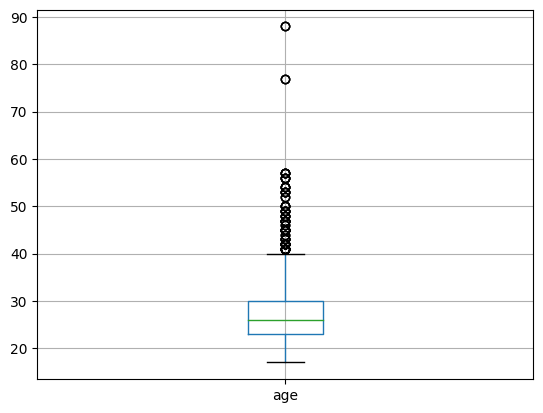

Min = 17 Q1 = 23.0 Q2 = 26.0 Q3 = 30.0 Max = 88
Mean = 75.21 Var = 69.2259 Std = 8.320210333879787


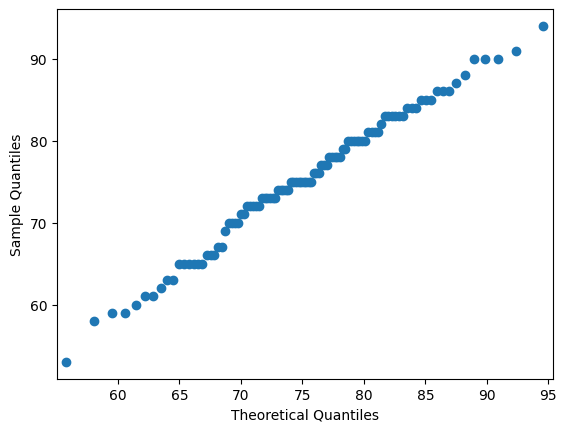

Mean = 75.66 Var = 47.976400000000005 Std = 6.926499837580306


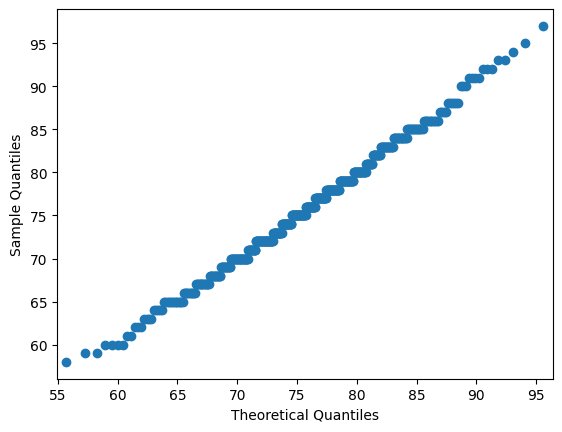

Mean = 75.292 Var = 47.231736000000005 Std = 6.872534903512677


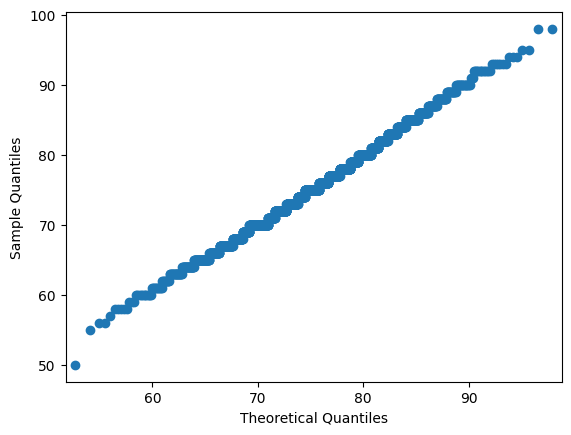

p_value = 0.5747080445289612
Normal


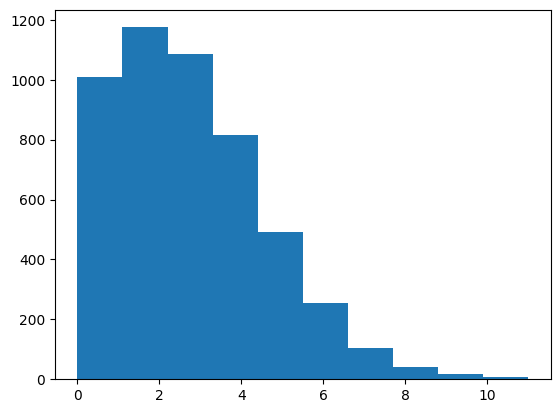

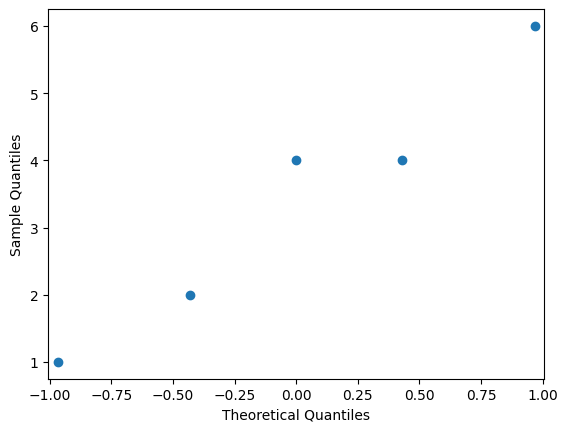

p_value = 0.7583119869232178
Normal


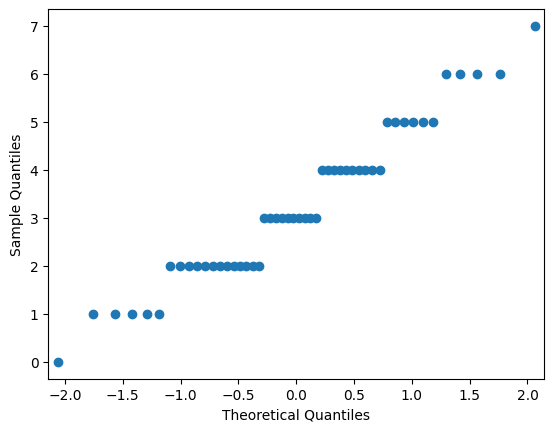

p_value = 0.041139960289001465
Not Normal


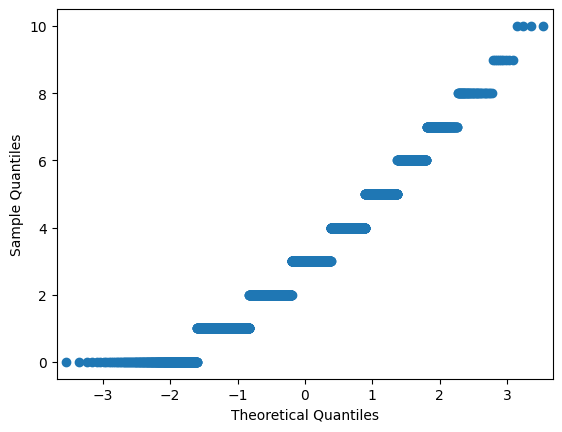

p_value = 8.050083569038249e-38
Not Normal


In [5]:
import numpy as np, random
import pandas as pd
import matplotlib.pyplot as mpl
import statsmodels.api as sm 
import scipy.stats as stats

def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
set_seed(810109203)

df = pd.read_csv('FIFA2020.csv', encoding = "ISO-8859-1")

#          Q1
mean_pace, mean_dribbling = df[['pace', 'dribbling']].mean(numeric_only = True)
df['dribbling'] = df['dribbling'].fillna(mean_dribbling)
df['pace'] = df['pace'].fillna(mean_pace)

#          Q2
age_box = df.boxplot(column = 'age')
age_box.plot()
mpl.show()

Min = df['age'].min()
Max = df['age'].max()
Q1 = df['age'].quantile(0.25)
Q2 = df['age'].quantile(0.5)
Q3 = df['age'].quantile(0.75)

print("Min =", Min, "Q1 =", Q1, "Q2 =", Q2, "Q3 =", Q3, "Max =", Max)

#          Q3
def calc(n):
    sample = np.random.choice(df['weight'].to_numpy(), n)

    # alef
    mean = np.mean(sample)
    var = np.var(sample)
    std = np.std(sample)

    print("Mean =", mean, "Var =", var, "Std =", std)

    # jim
    normal_sample = np.random.normal(mean, std, n)
    sm.qqplot(sample, loc = mean, scale = std)

# he
calc(100)
mpl.show()
calc(500)
mpl.show()
calc(2000)
mpl.show()

# dal
n = 100
sample = np.random.choice(df['weight'].to_numpy(), n)

statistic, p_value = stats.shapiro(sample)

print("p_value =", p_value)
if (p_value >= 0.05):
    print("Normal")
else:
    print("Not Normal")
    
#          Q4
# alef
landa = 3
n = 5000

poisson = np.random.poisson(landa, n)
mpl.hist(poisson)
mpl.show()

# be
landa = 3

def test(n):
    poisson = np.random.poisson(landa, n)
    sm.qqplot(poisson)
    mpl.show()
    
    statistic, p_value = stats.shapiro(poisson)
    
    print("p_value =", p_value)
    if (p_value >= 0.05):
        print("Normal")
    else:
        print("Not Normal")
        
test(5)
test(50)
test(5000)
